In [1]:
%matplotlib inline

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

# First Look into `tensorflow`

In [3]:
mnist = pd.read_csv("data/mnist_full.csv")

In [4]:
mnist.shape

(70000, 785)

In [5]:
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


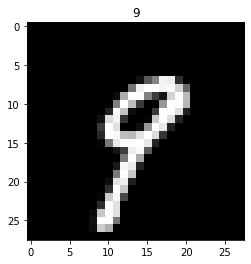

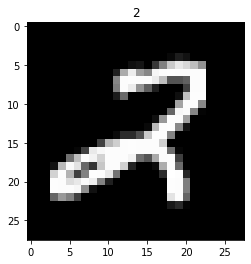

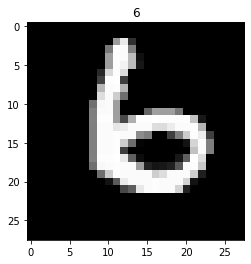

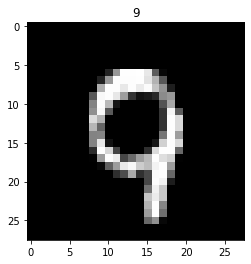

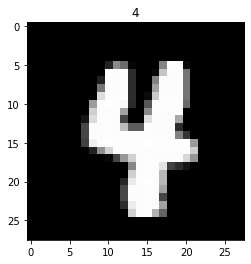

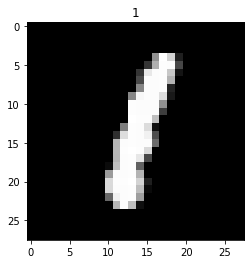

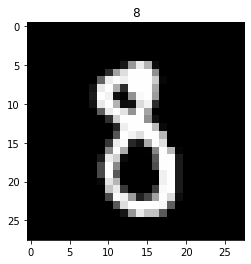

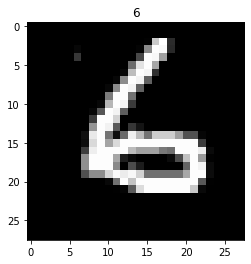

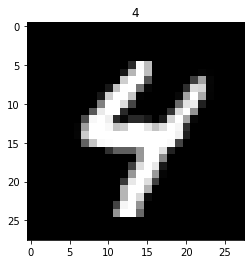

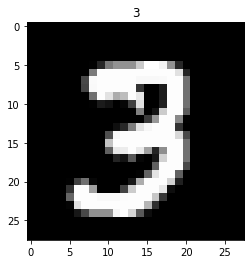

In [13]:
for index, row in mnist.sample(10).iterrows():
    image = row.values[:-1].reshape((28, 28))
    label = row.values[-1]
    plt.imshow(image, cmap = "gray")
    plt.title(label)
    plt.show()

In [28]:
mnist_data = mnist.drop(["class"], axis = 1)
mnist_labels = mnist["class"]

In [29]:
mnist_data = MinMaxScaler().fit_transform(mnist_data)

In [30]:
mnist_data.shape, mnist_labels.shape

((70000, 784), (70000,))

In [59]:
mnist_data_train_val, mnist_data_test, mnist_labels_train_val, mnist_labels_test = train_test_split(
    mnist_data,
    mnist_labels.values,
    test_size = 1500,
    stratify = mnist_labels)

In [60]:
mnist_data_train, mnist_data_val, mnist_labels_train, mnist_labels_val = train_test_split(
    mnist_data_train_val,
    mnist_labels_train_val,
    test_size = 1500,
    stratify = mnist_labels_train_val)

In [61]:
mnist_data_train.shape, mnist_labels_train.shape

((67000, 784), (67000,))

In [62]:
mnist_data_val.shape, mnist_labels_val.shape

((1500, 784), (1500,))

In [63]:
mnist_data_test.shape, mnist_labels_test.shape

((1500, 784), (1500,))

In [81]:
model = Sequential([
    Input(shape = (mnist.shape[1] - 1,)),
    Dense(units = 64, activation = "relu"),
    Dense(units = 32, activation = "relu"),
    Dense(units = 16, activation = "relu"),
    Dense(units = 10, activation = "softmax")
])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [84]:
history = model.fit(mnist_data_train, mnist_labels_train, epochs = 5)

Train on 67000 samples
Epoch 1/5
67000/67000 [==============================] - 7s 104us/sample - loss: 0.2862 - accuracy: 0.9167
Epoch 2/5
67000/67000 [==============================] - 6s 96us/sample - loss: 0.1237 - accuracy: 0.9627
Epoch 3/5
67000/67000 [==============================] - 6s 96us/sample - loss: 0.0912 - accuracy: 0.9716
Epoch 4/5
67000/67000 [==============================] - 7s 99us/sample - loss: 0.0715 - accuracy: 0.9780
Epoch 5/5
67000/67000 [==============================] - 7s 97us/sample - loss: 0.0600 - accuracy: 0.9822


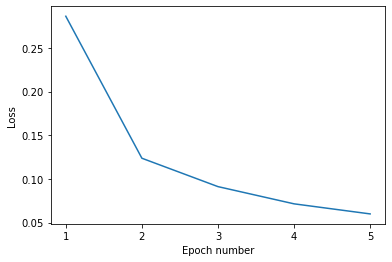

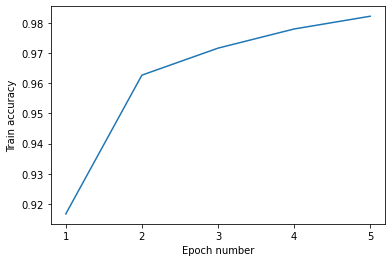

In [94]:
plt.plot(range(1, 6), history.history["loss"])
plt.xticks(range(1, 6))
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.show()

plt.plot(range(1, 6), history.history["accuracy"])
plt.xticks(range(1, 6))
plt.xlabel("Epoch number")
plt.ylabel("Train accuracy")
plt.show()

In [73]:
train_loss, train_accuracy = model.evaluate(mnist_data_train, mnist_labels_train)

67000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [74]:
val_loss, val_accuracy = model.evaluate(mnist_data_val, mnist_labels_val)

1500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [78]:
print(f"Train: {train_accuracy}")
print(f"Validation: {val_accuracy}")

Train: 0.9784925580024719
Validation: 0.972000002861023


In [95]:
history_later = model.fit(
    mnist_data_train,
    mnist_labels_train,
    epochs = 10,
    initial_epoch = 4,
    validation_data = (mnist_data_val, mnist_labels_val))

Train on 67000 samples, validate on 1500 samples
Epoch 7/10
67000/67000 [==============================] - 7s 99us/sample - loss: 0.0525 - accuracy: 0.9834 - val_loss: 0.0891 - val_accuracy: 0.9793
Epoch 8/10
67000/67000 [==============================] - 7s 100us/sample - loss: 0.0429 - accuracy: 0.9865 - val_loss: 0.0865 - val_accuracy: 0.9767
Epoch 9/10
67000/67000 [==============================] - 7s 97us/sample - loss: 0.0390 - accuracy: 0.9868 - val_loss: 0.0805 - val_accuracy: 0.9793
Epoch 10/10
67000/67000 [==============================] - 7s 97us/sample - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0718 - val_accuracy: 0.9800


In [98]:
history_later = history_later.history

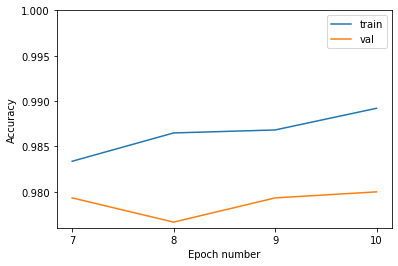

In [107]:
plt.plot(range(7, 11), history_later["accuracy"], label = "train")
plt.plot(range(7, 11), history_later["val_accuracy"], label = "val")

plt.ylim(plt.ylim()[0], 1)

plt.xticks(range(7, 11))
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()